In [ ]:
import masp as srs
import numpy as np
import soundfile as sf
from IPython.display import Audio
import scipy.signal as sig
import pandas as pd
from os.path import join as pjoin
from multiprocessing import Pool
import matplotlib.pyplot as plt
from multiprocessing import Pool
import helpers as hlp
import importlib
importlib.reload(hlp);
import argparse

fs_rir = 48000
fs_target = 48000
ambi_order = 1
rims_d = .0 # Displacement for Randomized Image Source method
maxlim = 2. # Maximum reverberation time
band_centerfreqs=np.array([32,63,125,250,500,1000,2000,4000,8000,16000]) #change this for multiband
#The highest center frequency must be at most equal to fs/2, in order to avoid aliasing.
#The lowest center frequency must be at least equal to 30 Hz.
#band_centerfreqs=np.array([1000])
rt60 =np.array([0.8445001280548805, 0.4183348018766204, 0.4929216438072096, 0.3504161388991753, 0.32336034680502135, 0.6314508961879481, 0.13069006354390814, 0.12669254582680198, 0.23500189168669827, 0.3409718173450506])
mic = np.array([[0.5455,	1.3333,	0.8333]])
room = np.array([6, 4, 2.5])
src = np.array([[0.5455,	0.6667,	0.8333]])

In [ ]:
limits = np.minimum(rt60, maxlim)

In [ ]:
# Compute absorption coefficients for desired rt60 and room dimensions
abs_walls,rt60_true = srs.find_abs_coeffs_from_rt(room, rt60)
# Small correction for sound absorption coefficients:
if sum(rt60_true-rt60>0.05*rt60_true)>0 :
    abs_walls,rt60_true = srs.find_abs_coeffs_from_rt(room, rt60_true + abs(rt60-rt60_true))

In [ ]:
 # Compute IRs with MASP at 48k:
abs_echograms = srs.compute_echograms_sh(room, src, mic, abs_walls, limits, ambi_order, np.array([0,0]))


In [ ]:
mic_rirs = srs.render_rirs_sh(abs_echograms, band_centerfreqs, fs_rir)/np.sqrt(4*np.pi)

In [15]:
np.argmax(mic_rirs[:,0,0,0])

93

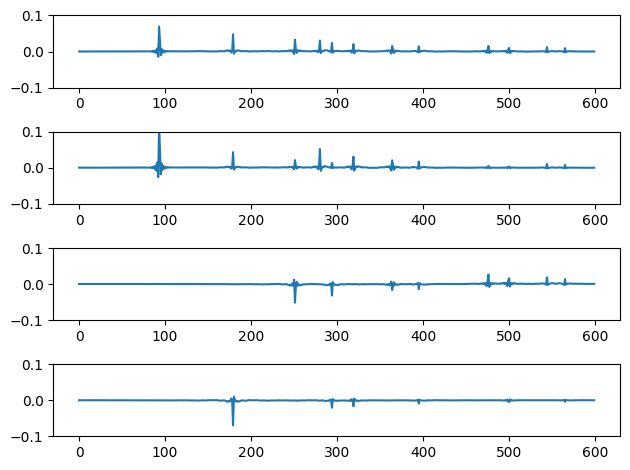

In [14]:
plt.subplot(4,1,1)
plt.plot(mic_rirs[0:600,0,0,0])
plt.ylim([-0.1, 0.1])
plt.subplot(4,1,2)
plt.plot(mic_rirs[0:600,1,0,0])
plt.ylim([-0.1, 0.1])

plt.subplot(4,1,3)
plt.plot(mic_rirs[0:600,2,0,0])
plt.ylim([-0.1, 0.1])

plt.subplot(4,1,4)
plt.plot(mic_rirs[0:600,3,0,0])
plt.ylim([-0.1, 0.1])
plt.tight_layout()

In [ ]:
np.random.uniform(-0, 0)